#Importando dados

Começamos importando todos os dados necessarios para nosso treinamento, assim como as bibliotecas que serão usadas:

In [909]:
import numpy as np
import math
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


def normalize(a, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(a, order, axis))
    l2[l2==0] = 1
    return (a / np.expand_dims(l2, axis)).transpose()


Quantidade de dados:  2000
Quantidade de dados de treino 500
(2000, 144)
(2000,)
(2000,)


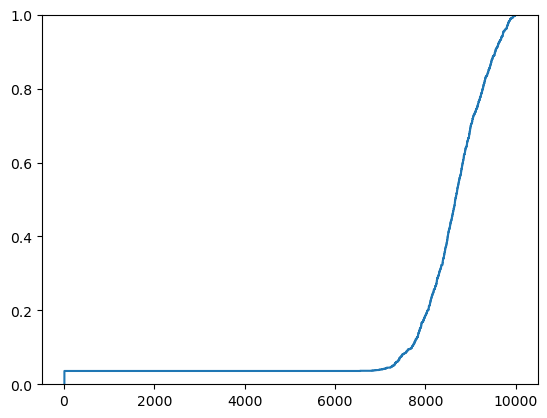

In [910]:

scaler=StandardScaler()
x_data = pd.read_csv("inputs_finais.csv",skiprows=1,header=None)
y_data = pd.read_csv("targets_finais.csv")
qte_total=np.shape(y_data)[0]
qte_training=500
x_data = np.array(x_data.iloc[:qte_total,:])
x_data=scaler.fit_transform(x_data)
#_data = (x_data - np.mean(x_data,axis=0))/np.std(x_data,axis=0)
y_fopt = np.array(y_data.iloc[:,0])
y_fwpt = np.array(y_data.iloc[:,1])
plt.ecdf(y_fopt)

y_fopt = (y_fopt - np.mean(y_fopt))/np.std(y_fopt)
y_fwpt = (y_fwpt - np.mean(y_fwpt))/np.std(y_fwpt)


#Vamos permutar as matrizes

n_rows = qte_total
permutation = np.random.permutation(n_rows)

x_data=x_data[permutation]
y_fopt = y_fopt[permutation]
y_fwpt=y_fwpt[permutation]
print("Quantidade de dados: ",qte_total)
print("Quantidade de dados de treino",qte_training)
print(np.shape(x_data))
print(np.shape(y_fopt))
print(np.shape(y_fwpt))
#print(x_data)

Separamos os dados de treino e de teste.

In [911]:
x_train_data = x_data[:qte_training]
y_train_fopt = y_fopt[:qte_training]
y_train_fwpt = y_fwpt[:qte_training]
y_train_data = np.column_stack((y_train_fopt,y_train_fwpt))

x_test_data = x_data[qte_training:]
y_test_fopt = y_fopt[qte_training:]
y_test_fwpt = y_fwpt[qte_training:]
y_test_data = np.column_stack((y_test_fopt,y_test_fwpt))

print(np.shape(x_train_data))
print(np.shape(y_train_fopt))
print(np.shape(x_test_data))
print(np.shape(y_test_fopt))
#Aqui retiramos apenas as características boas

num_features=1
pca=PCA(n_components=num_features)

pca.fit(x_train_data)
#print(pca.singular_values_)
#vemos que so os primeiros 7 realmente tem alguma importancia na reprensetatividade do problema, logo:

x_train_data=pca.fit_transform(x_train_data)
x_test_data = pca.transform(x_test_data)
print(sum(pca.explained_variance_ratio_))
print(np.shape(x_train_data))
#print(np.shape(x_transformed_pca))

print(x_test_data)
print(x_train_data)

(500, 144)
(500,)
(1500, 144)
(1500,)
0.6409747066651207
(500, 1)
[[ -0.78982123]
 [ 12.53557992]
 [ 12.53416558]
 ...
 [ -0.75931336]
 [ -0.78734605]
 [-11.02409121]]
[[ 12.51405351]
 [ -0.78709725]
 [-10.98915686]
 [ -0.77582148]
 [ 12.54199702]
 [-10.99664781]
 [ -0.77956696]
 [ -0.78734605]
 [-11.03260364]
 [ -0.7942477 ]
 [ -0.77514049]
 [ -0.75556788]
 [-11.033949  ]
 [ -0.77207601]
 [-10.99392383]
 [ -0.77479999]
 [ -0.79458819]
 [ -0.78126944]
 [ 12.5256138 ]
 [ -0.77888596]
 [-11.03905647]
 [ -0.803084  ]
 [ -0.774119  ]
 [ -0.78948073]
 [ -0.78121709]
 [ 12.52118733]
 [-10.9976693 ]
 [-11.01009146]
 [ 12.52629479]
 [ -0.77990745]
 [-10.98915686]
 [ -0.79152372]
 [-10.98915686]
 [-11.03088453]
 [ 12.56191013]
 [-11.03224652]
 [-10.99494532]
 [-11.01792291]
 [-11.03735398]
 [ 12.53961354]
 [ 12.55646217]
 [ -0.7525034 ]
 [ -0.77684298]
 [ -0.77718347]
 [-11.01145345]
 [ -0.78092895]
 [ 12.54199702]
 [ 12.52018247]
 [ -0.79084272]
 [ -0.75522738]
 [-11.01514658]
 [-11.02613419]


#Fit do polinômio

Agora criamos o polinômio que ajustaremos, com o mesmo formato daquele mencionado no relatório: um polinomio de grau 2 com interações entre os parâmetros.
O metodo fit_transform ja faz a transformação nos inputs , nos dando um novo conjunto com os valores que usaremos no ajuste.

In [912]:
poly=PolynomialFeatures(2,include_bias=False)


x_training_transformed=poly.fit_transform(x_train_data)
#x_training_transformed = (x_training_transformed - np.mean(x_training_transformed))/np.std(x_training_transformed)
np.shape(x_training_transformed)

(500, 2)

Fazemos o ajuste, usando modelos com 50, 100 e 150 dados de treinamento.

In [913]:
poly_50_fopt = LinearRegression().fit(x_training_transformed[:qte_training//3],y_train_fopt[:qte_training//3])
poly_100_fopt = LinearRegression().fit(x_training_transformed[:qte_training//2],y_train_fopt[:qte_training//2])
poly_150_fopt = LinearRegression().fit(x_training_transformed[:qte_training],y_train_fopt[:qte_training])

poly_50_fwpt = LinearRegression().fit(x_training_transformed[:qte_training//3],y_train_fwpt[:qte_training//3])
poly_100_fwpt = LinearRegression().fit(x_training_transformed[:qte_training//2],y_train_fwpt[:qte_training//2])
poly_150_fwpt = LinearRegression().fit(x_training_transformed[:qte_training],y_train_fwpt[:qte_training])

Agora fazemos a predição, lembrando do fato de que precisamos transformar também os dados de teste.

In [914]:
x_test_transformed = poly.fit_transform(x_test_data)

ypred_50_fopt=poly_50_fopt.predict(x_test_transformed)
ypred_100_fopt=poly_100_fopt.predict(x_test_transformed)
ypred_150_fopt=poly_150_fopt.predict(x_test_transformed)

ypred_50_fwpt=poly_50_fwpt.predict(x_test_transformed)
ypred_100_fwpt=poly_100_fwpt.predict(x_test_transformed)
ypred_150_fwpt=poly_150_fwpt.predict(x_test_transformed)




np.shape(ypred_50_fopt)

print(ypred_50_fopt)
print(y_fopt)


[ 0.00695586 -0.21953644 -0.21949652 ...  0.00677905  0.00694157
 -0.02224592]
[ 0.14466313 -0.15421034 -0.26860183 ... -0.12361028  0.75641792
  0.54658234]


##Gráficos e resultados do fit.
Plotamos as curvas da função cumulativa e os desvios médios/máximos de cada polinomio preditor.

Text(0.5, 1.0, 'CDF da Prod. Total de água')

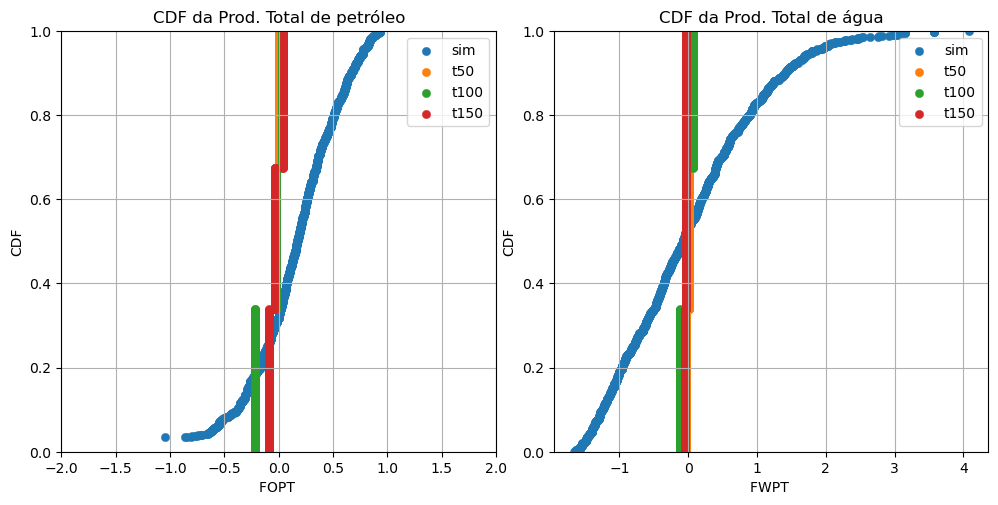

In [915]:

fig, axs = plt.subplots(1,2,figsize=(10,4.8))

fig.tight_layout()

# axs[0].ecdf(y_test_fopt, label='sim')
# axs[0].ecdf(ypred_50_fopt, label = 't50')
# axs[0].ecdf(ypred_100_fopt,label = 't100')
# axs[0].ecdf(ypred_150_fopt, label='t150')
# axs[0].legend()
# axs[0].grid()
# axs[0].set_xlabel("FOPT ")
# axs[0].set_ylabel("CDF")
# #axs[0].set_yticks([-0.2,1.1])
# axs[0].set_title("CDF da Prod. Total de petróleo")

axs[0].scatter(np.sort(y_test_fopt),np.arange(len(np.sort(y_test_fopt)))/float(len(np.sort(y_test_fopt))), label='sim',linewidths=0.3)
axs[0].scatter(np.sort(ypred_50_fopt),np.arange(len(np.sort(ypred_50_fopt)))/float(len(np.sort(ypred_50_fopt))), label='t50',linewidths=0.3)
axs[0].scatter(np.sort(ypred_100_fopt),np.arange(len(np.sort(ypred_100_fopt)))/float(len(np.sort(ypred_100_fopt))), label='t100',linewidths=0.3)
axs[0].scatter(np.sort(ypred_150_fopt),np.arange(len(np.sort(ypred_150_fopt)))/float(len(np.sort(ypred_150_fopt))), label='t150',linewidths=0.3)
axs[0].legend()
axs[0].grid()
axs[0].set_xlabel("FOPT ")
axs[0].set_ylabel("CDF")
axs[0].set_ylim([0,1])
axs[0].set_xlim([-2,2])
axs[0].set_title("CDF da Prod. Total de petróleo")

axs[1].scatter(np.sort(y_test_fwpt),np.arange(len(np.sort(y_test_fwpt)))/float(len(np.sort(y_test_fwpt))), label='sim',linewidths=0.3)
axs[1].scatter(np.sort(ypred_50_fwpt),np.arange(len(np.sort(ypred_50_fwpt)))/float(len(np.sort(ypred_50_fwpt))), label='t50',linewidths=0.3)
axs[1].scatter(np.sort(ypred_100_fwpt),np.arange(len(np.sort(ypred_100_fwpt)))/float(len(np.sort(ypred_100_fwpt))), label='t100',linewidths=0.3)
axs[1].scatter(np.sort(ypred_150_fwpt),np.arange(len(np.sort(ypred_150_fwpt)))/float(len(np.sort(ypred_150_fwpt))), label='t150',linewidths=0.3)
axs[1].legend()
axs[1].grid()
axs[1].set_xlabel("FWPT ")
axs[1].set_ylabel("CDF")
axs[1].set_ylim([0,1])
axs[1].set_title("CDF da Prod. Total de água")

# axs[1].ecdf(y_test_fwpt,label = 'sim')
# axs[1].ecdf(ypred_50_fwpt,label = 't50')
# axs[1].ecdf(ypred_100_fwpt,label = 't100')
# axs[1].ecdf(ypred_150_fwpt,label = 't150')
# axs[1].set_xlabel("FWTP")
# axs[1].set_title("CDF da Prod. Total de água")
# axs[1].legend()
# axs[1].grid()

E o resultado do desvio que queremos é

In [916]:


RE_50_fopt =np.abs( np.abs(y_test_fopt - ypred_50_fopt) / y_test_fopt)
RE_100_fopt = np.abs(np.abs(y_test_fopt - ypred_100_fopt) / y_test_fopt)
RE_150_fopt =np.abs( np.abs(y_test_fopt - ypred_150_fopt) / y_test_fopt)

RE_50_fwpt =np.abs( np.abs(y_test_fwpt - ypred_50_fwpt) / y_test_fwpt)
RE_100_fwpt = np.abs(np.abs(y_test_fwpt - ypred_100_fwpt) / y_test_fwpt)
RE_150_fwpt =np.abs( np.abs(y_test_fwpt - ypred_150_fwpt) / y_test_fwpt)


print('O valor médio para o caso de 50 treinamentos é: {:.2f}%'.format(np.mean(RE_50_fopt)))
print('O valor médio para o caso de 50 treinamentos é: {:.2f}%'.format(np.mean(RE_50_fwpt)))

print('O valor médio para o caso de 100 treinamentos é: {:.2f}%'.format(np.mean(RE_100_fopt)))
print('O valor médio para o caso de 100 treinamentos é: {:.2f}%'.format(np.mean(RE_100_fwpt)))

print('O valor médio para o caso de 150 treinamentos é: {:.2f}%'.format(np.mean(RE_150_fopt)))
print('O valor médio para o caso de 150 treinamentos é: {:.2f}%'.format(np.mean(RE_150_fwpt)))


O valor médio para o caso de 50 treinamentos é: 1.62%
O valor médio para o caso de 50 treinamentos é: 1.59%
O valor médio para o caso de 100 treinamentos é: 1.63%
O valor médio para o caso de 100 treinamentos é: 3.98%
O valor médio para o caso de 150 treinamentos é: 1.33%
O valor médio para o caso de 150 treinamentos é: 2.13%


#Rede Neural

Começamos pela estrutuda da nossa rede. Importamos todos os pacotes necessários:

In [917]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init
import torchvision.models as models
from torchvision import transforms
import torchvision.transforms as transforms
import torch.utils.data as data
import torchvision
import random
import math
from torch.autograd import Variable
from torch.nn.functional import kl_div, softmax, log_softmax
import torch.optim as optim
import torch.utils.data as data


In [918]:
 qte_input_param=np.shape(x_data)[1]
# print(qte_input_param)
# class SimpleNetwork(nn.Module):
#     def __init__(self):
#         super(SimpleNetwork,self).__init__()
#         self.linear1=nn.Linear(qte_input_param, 200)
#         self.linear2=nn.Linear(200,50)
#         self.linear3=nn.Linear(50,10)
#         self.linear4=nn.Linear(10,2)

#     def forward(self,x):

#         x=F.tanh(self.linear1(x))
#         x=F.tanh(self.linear2(x))
#         x=F.tanh(self.linear3(x))
#         x=self.linear4(x)
#         return x

class SimpleNetwork(nn.Module):
    def __init__(self):
        super(SimpleNetwork,self).__init__()
        self.linear1=nn.Linear(num_features,5)
        self.linear2=nn.Linear(5,7)
        self.linear3=nn.Linear(7,2)

    def forward(self,x):

        x=F.tanh(self.linear1(x))
        x=F.tanh(self.linear2(x))
        x=self.linear3(x)

        return x

# class SimpleNetwork(nn.Module):
#     def __init__(self):
#         super(SimpleNetwork,self).__init__()
#         self.linear1=nn.Linear(qte_input_param, 10)
#         #self.dropout1=nn.Dropout(p=0.5)
#         self.linear2=nn.Linear(10,2)
#         #self.dropout2=nn.Dropout(p=0.2)
#         #self.linear3=nn.Linear(10,2)

#     def forward(self,x):

#         x=F.tanh(self.linear1(x))
#         x=self.linear2(x)
#         #x=self.dropout1(x)
#         #x=F.relu(self.linear2(x))
#         #x=self.dropout2(x)
#         #x=self.linear3(x)
#         return x



Fazemos também nosso otimizador e a função de perda e outros himerparâmetros do processo de treinamento:

In [919]:

batch_size=2
lr=0.001
criterion = nn.MSELoss()

#para variarmos o LR durante o treinamento, fazendo a rede trabalhar na regiao de
#minimo da perda
def learning_rate_scheduler(init,epoch):
  optim_factor=0
  if (epoch>50):
    optim_factor=3
  elif (epoch>20):
    optim_factor=2
  elif (epoch>10):
    optim_factor=1
  return init*math.pow(0.1,optim_factor)


Temos que fazer também data loaders e uma função de treino. Também passamos os dados pra um formato convencional do PyTorch:



In [920]:
class CustomDataset(data.Dataset):
    def __init__(self, feature_file,target_file, transform=None,phase='label'):
        self.labels = target_file
        self.features = feature_file
        self.transform = transform
        self.phase=phase


    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        if self.phase=='label': #caso de treino
          feature=self.features[idx].astype(float)
          label=self.labels[idx].astype(float)
        else:
          feature = self.features[idx].astype(float)
        return feature.astype(np.float32), label.astype(np.float32)




def test(epoch,net,testloader):
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    counter = []
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):

            #inputs, targets = inputs.cuda(), targets.cuda()
            inputs, targets = Variable(inputs), Variable(targets)
            outputs = net(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            counter.append(loss.item())




    print("\n| Validation Epoch #%d\t\t\tLoss: %.4f " %(epoch, loss.item()))
    return 1,np.mean(counter)

def train(epoch,net,trainloader,log_interval=5):
    net.train()
    train_loss = 0
    counter=[]
    print('\n=> Training Epoch #%d, LR=%.4f' %(epoch, learning_rate_scheduler(lr, epoch)))
    optimizer = optim.SGD(net.parameters(), lr=learning_rate_scheduler(lr, epoch), momentum=0.9, weight_decay=5e-4)
    for batch_idx, (inputs, targets) in enumerate(trainloader):

        #inputs, targets = inputs.cuda(), targets.cuda() # GPU settings
        optimizer.zero_grad()
        #inputs, targets = Variable(inputs), Variable(targets)
        outputs = net(inputs)               # Forward Propagation
        loss = criterion(outputs, targets)  # Loss
        loss.backward()  # Backward Propagation
        optimizer.step() # Optimizer update
        counter.append(loss.item())
        train_loss += loss.item()
        if batch_idx % log_interval == 0:
            print('| Epoch [%3d/%3d] Iter[%3d/%3d]\t\tLoss: %.4f '
                %(epoch, n_epochs, batch_idx+1,
                    (len(trainloader.dataset)//batch_size)+1, loss.item()))
    return np.mean(counter), 1
print(y_test_data)
train_loader_150=data.DataLoader(CustomDataset(x_train_data,y_train_data),
                            batch_size=batch_size, shuffle=True)

train_loader_100=data.DataLoader(CustomDataset(x_train_data[:qte_training//2],y_train_data[:qte_training//2]),
                            batch_size=batch_size, shuffle=True)

train_loader_50=data.DataLoader(CustomDataset(x_train_data[:qte_training//3],y_train_data[:qte_training//3]),
                            batch_size=batch_size, shuffle=True)

test_loader=data.DataLoader(CustomDataset(x_test_data,y_test_data),
                            batch_size=batch_size, shuffle=False)

[[ 0.77527663 -0.04434602]
 [ 0.19047397  2.29818459]
 [ 0.38399086  0.60202405]
 ...
 [-0.12361028 -0.63345603]
 [ 0.75641792  0.03295394]
 [ 0.54658234 -0.18232344]]


#Treinamento da Rede
Agora treinamos nosso modelo.


=> Training Epoch #0, LR=0.0010
| Epoch [  0/ 60] Iter[  1/251]		Loss: 10.2532 
| Epoch [  0/ 60] Iter[  6/251]		Loss: 7.8384 
| Epoch [  0/ 60] Iter[ 11/251]		Loss: 7.7584 
| Epoch [  0/ 60] Iter[ 16/251]		Loss: 3.0244 
| Epoch [  0/ 60] Iter[ 21/251]		Loss: 3.8963 
| Epoch [  0/ 60] Iter[ 26/251]		Loss: 1.1536 
| Epoch [  0/ 60] Iter[ 31/251]		Loss: 1.9240 
| Epoch [  0/ 60] Iter[ 36/251]		Loss: 0.2783 
| Epoch [  0/ 60] Iter[ 41/251]		Loss: 0.5154 
| Epoch [  0/ 60] Iter[ 46/251]		Loss: 0.8106 
| Epoch [  0/ 60] Iter[ 51/251]		Loss: 0.3468 
| Epoch [  0/ 60] Iter[ 56/251]		Loss: 0.4440 
| Epoch [  0/ 60] Iter[ 61/251]		Loss: 0.0557 
| Epoch [  0/ 60] Iter[ 66/251]		Loss: 0.3906 
| Epoch [  0/ 60] Iter[ 71/251]		Loss: 1.2871 
| Epoch [  0/ 60] Iter[ 76/251]		Loss: 1.0629 
| Epoch [  0/ 60] Iter[ 81/251]		Loss: 0.2894 
| Epoch [  0/ 60] Iter[ 86/251]		Loss: 0.1409 
| Epoch [  0/ 60] Iter[ 91/251]		Loss: 1.3290 
| Epoch [  0/ 60] Iter[ 96/251]		Loss: 0.0787 
| Epoch [  0/ 60] Iter[101

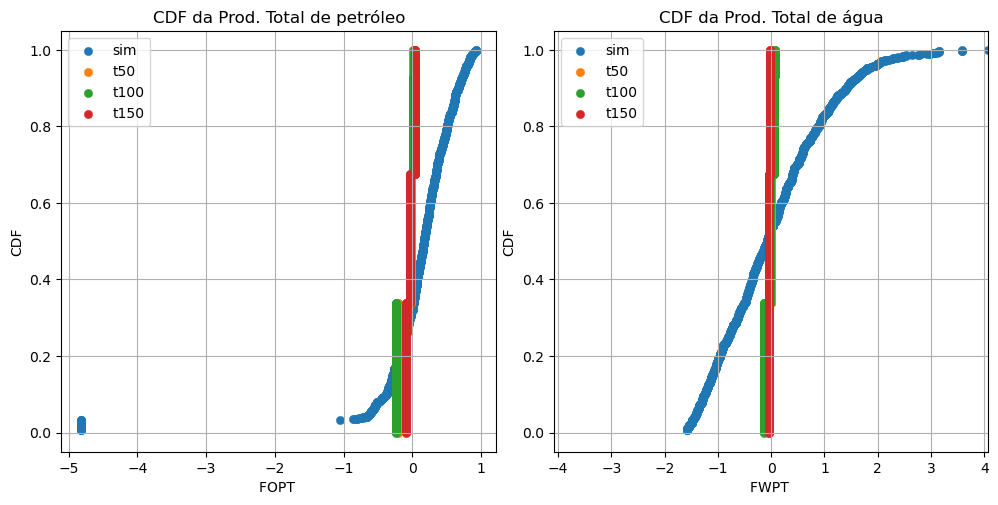

In [921]:
n_epochs=60
#lr=0.001
loss_training=[]
loss_test=[]
def weights_init_uniform(m):
      classname = m.__class__.__name__
      # for every Linear layer in a model..
      if classname.find('Linear') != -1:
          # apply a uniform distribution to the weights and a bias=0
          m.weight.data.uniform_(0.0, 1.0)
          m.bias.data.fill_(0)

rede_neural_150 = SimpleNetwork()
rede_neural_150.apply(weights_init_uniform)
#rede_neural_150= rede_neural_150.cuda()

rede_neural_100 = SimpleNetwork()
rede_neural_100.apply(weights_init_uniform)
#rede_neural_100= rede_neural_100.cuda()

rede_neural_50 = SimpleNetwork()
rede_neural_50.apply(weights_init_uniform)
#rede_neural_50= rede_neural_50.cuda()

# x_train_data=torch.tensor(x_train_data, dtype=torch.float32)
# y_train_data=torch.tensor(y_train_data, dtype=torch.float32)

#optimizer = optim.Adam(rede_neural_150.parameters(), lr)
for epoch in range(n_epochs):
    #rede_neural_150.train()
    loss_training_value,__=train(epoch,rede_neural_150,train_loader_150)
    __,loss_test_value =test(epoch,rede_neural_150,test_loader)
    # y_train_prediction=rede_neural_150(x_train_data)
    # loss=criterion(y_train_prediction,y_train_data)
    # optimizer.zero_grad()
    # loss.backward()
    # optimizer.step()
    # if epoch%10 == 0 :
    #   print(f'[epoch:{epoch}]: The loss value for training part={loss}')

    loss_training.append(loss_training_value)
    loss_test.append(loss_test_value)

for epoch in range(n_epochs):


    loss_training_value,__=train(epoch,rede_neural_100,train_loader_100)
    __,loss_test_value =test(epoch,rede_neural_100,test_loader)



    loss_training.append(loss_training_value)
    loss_test.append(loss_test_value)

for epoch in range(n_epochs):

    loss_training_value,__=train(epoch,rede_neural_50,train_loader_50)
    __,loss_test_value =test(epoch,rede_neural_50,test_loader)

    loss_training.append(loss_training_value)
    loss_test.append(loss_test_value)


y150_net_predict = rede_neural_150(torch.from_numpy(x_test_data).to(torch.float32)).cpu().detach().numpy()
#y150_net_predict = rede_neural_150(torch.tensor(x_test_data,dtype=torch.float32))
#print(y150_net_predict)
y150_net_predict_fopt=np.transpose(y150_net_predict)[0]
y150_net_predict_fwpt=np.transpose(y150_net_predict)[1]


y100_net_predict = rede_neural_100(torch.from_numpy(x_test_data).to(torch.float32)).cpu().detach().numpy()
y100_net_predict_fopt=y100_net_predict.transpose()[0]
y100_net_predict_fwpt=y100_net_predict.transpose()[1]

y50_net_predict = rede_neural_50(torch.from_numpy(x_test_data).to(torch.float32)).cpu().detach().numpy()
y50_net_predict_fopt=y50_net_predict.transpose()[0]
y50_net_predict_fwpt=y50_net_predict.transpose()[1]

fig, axs = plt.subplots(1,2,figsize=(10,4.8))

fig.tight_layout()

axs[0].scatter(np.sort(y_test_fopt)[10:],np.arange(len(np.sort(y_test_fopt)))[10:]/float(len(np.sort(y_test_fopt))), label='sim',linewidths=0.3)
axs[0].scatter(np.sort(y50_net_predict_fopt),np.arange(len(np.sort(y50_net_predict_fopt)))/float(len(np.sort(y50_net_predict_fopt))), label='t50',linewidths=0.3)
axs[0].scatter(np.sort(y100_net_predict_fopt),np.arange(len(np.sort(y100_net_predict_fopt)))/float(len(np.sort(y100_net_predict_fopt))), label='t100',linewidths=0.3)
axs[0].scatter(np.sort(y150_net_predict_fopt),np.arange(len(np.sort(y150_net_predict_fopt)))/float(len(np.sort(y150_net_predict_fopt))), label='t150',linewidths=0.3)
axs[0].legend()
axs[0].grid()
axs[0].set_xlabel("FOPT ")
axs[0].set_ylabel("CDF")
#axs[0].set_ylim([0,1.02])
#axs[0].set_xlim([min(y_test_fopt),-min(y_test_fopt)])

#axs[0].set_xlim([-1,1])
axs[0].set_title("CDF da Prod. Total de petróleo")


axs[1].scatter(np.sort(y_test_fwpt)[10:],np.arange(len(np.sort(y_test_fwpt)))[10:]/float(len(np.sort(y_test_fwpt))), label='sim',linewidths=0.3)
axs[1].scatter(np.sort(y50_net_predict_fwpt),np.arange(len(np.sort(y50_net_predict_fwpt)))/float(len(np.sort(y50_net_predict_fwpt))), label='t50',linewidths=0.3)
axs[1].scatter(np.sort(y100_net_predict_fwpt),np.arange(len(np.sort(y100_net_predict_fwpt)))/float(len(np.sort(y100_net_predict_fwpt))), label='t100',linewidths=0.3)
axs[1].scatter(np.sort(y150_net_predict_fwpt),np.arange(len(np.sort(y150_net_predict_fwpt)))/float(len(np.sort(y150_net_predict_fwpt))), label='t150',linewidths=0.3)
axs[1].legend()
axs[1].grid()
axs[1].set_xlabel("FWPT ")
axs[1].set_ylabel("CDF")
#axs[1].set_ylim([0,1.02])

axs[1].set_xlim([-max(y_test_fwpt),max(y_test_fwpt)])
axs[1].set_title("CDF da Prod. Total de água")

RE_50_fopt =np.abs( np.abs(y_test_fopt - y50_net_predict_fopt) / y_test_fopt)
RE_100_fopt = np.abs(np.abs(y_test_fopt -  y100_net_predict_fopt) / y_test_fopt)
RE_150_fopt =np.abs( np.abs(y_test_fopt -  y150_net_predict_fopt) / y_test_fopt)

RE_50_fwpt =np.abs( np.abs(y_test_fwpt -  y50_net_predict_fwpt) / y_test_fwpt)
RE_100_fwpt = np.abs(np.abs(y_test_fwpt - y100_net_predict_fwpt) / y_test_fwpt)
RE_150_fwpt =np.abs( np.abs(y_test_fwpt - y150_net_predict_fwpt) / y_test_fwpt)


print('O valor médio para o caso de 50 treinamentos é: {:.2f}%'.format(np.mean(RE_50_fopt)))
print('O valor médio para o caso de 50 treinamentos é: {:.2f}%'.format(np.mean(RE_50_fwpt)))

print('O valor médio para o caso de 100 treinamentos é: {:.2f}%'.format(np.mean(RE_100_fopt)))
print('O valor médio para o caso de 100 treinamentos é: {:.2f}%'.format(np.mean(RE_100_fwpt)))

print('O valor médio para o caso de 150 treinamentos é: {:.2f}%'.format(np.mean(RE_150_fopt)))
print('O valor médio para o caso de 150 treinamentos é: {:.2f}%'.format(np.mean(RE_150_fwpt)))


# y150_net_predict = rede_neural_150(torch.from_numpy(x_train_data).to(torch.float32).cuda()).cpu().detach().numpy()
# print(y150_net_predict_fopt)




O valor médio para o caso de 50 treinamentos é: 1.60%
O valor médio para o caso de 50 treinamentos é: 2.26%
500
teste [[-0.69050201  0.68648865  0.62472514 ...  1.4430374   1.42401904
   1.4430374 ]
 [ 1.29687186  0.74110498  0.80056784 ...  0.73462434  0.77182503
   0.73462434]
 [ 1.1864622  -1.40071169 -1.39746587 ... -1.39061484 -1.37109815
  -1.39061484]
 ...
 [-1.02173098  0.74110498  0.80056784 ... -1.39061484 -1.37109815
  -1.39061484]
 [-1.57377928  0.74110498  0.80056784 ...  0.02621128  0.02646044
   0.02621128]
 [ 1.1864622  -1.40071169 -1.39746587 ...  0.73462434  0.77182503
   0.73462434]]
[ 0.77527663  0.19047397  0.38399086 ... -0.12361028  0.75641792
  0.54658234]


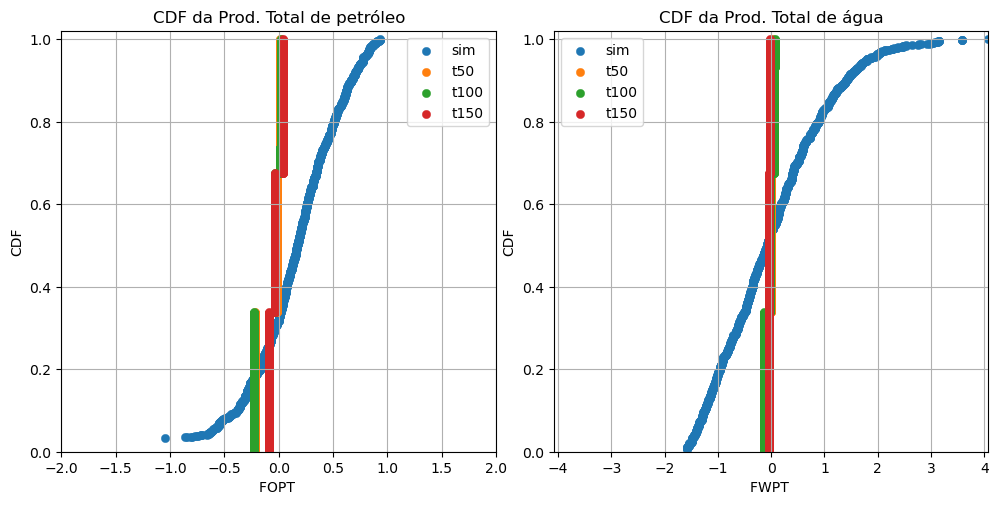

In [922]:
print('O valor médio para o caso de 50 treinamentos é: {:.2f}%'.format(np.mean(RE_50_fopt)))
print('O valor médio para o caso de 50 treinamentos é: {:.2f}%'.format(np.mean(RE_50_fwpt)))
fig, axs = plt.subplots(1,2,figsize=(10,4.8))
fig.tight_layout()
axs[0].scatter(np.sort(y_test_fopt)[10:],np.arange(len(np.sort(y_test_fopt)))[10:]/float(len(np.sort(y_test_fopt))), label='sim',linewidths=0.3)
axs[0].scatter(np.sort(y50_net_predict_fopt),np.arange(len(np.sort(y50_net_predict_fopt)))/float(len(np.sort(y50_net_predict_fopt))), label='t50',linewidths=0.3)
axs[0].scatter(np.sort(y100_net_predict_fopt),np.arange(len(np.sort(y100_net_predict_fopt)))/float(len(np.sort(y100_net_predict_fopt))), label='t100',linewidths=0.3)
axs[0].scatter(np.sort(y150_net_predict_fopt),np.arange(len(np.sort(y150_net_predict_fopt)))/float(len(np.sort(y150_net_predict_fopt))), label='t150',linewidths=0.3)
axs[0].legend()
axs[0].grid()
axs[0].set_xlabel("FOPT ")
axs[0].set_ylabel("CDF")
axs[0].set_ylim([0,1.02])
axs[0].set_xlim([-2,2])
axs[0].set_title("CDF da Prod. Total de petróleo")

axs[1].scatter(np.sort(y_test_fwpt)[10:],np.arange(len(np.sort(y_test_fwpt)))[10:]/float(len(np.sort(y_test_fwpt))), label='sim',linewidths=0.3)
axs[1].scatter(np.sort(y50_net_predict_fwpt),np.arange(len(np.sort(y50_net_predict_fwpt)))/float(len(np.sort(y50_net_predict_fwpt))), label='t50',linewidths=0.3)
axs[1].scatter(np.sort(y100_net_predict_fwpt),np.arange(len(np.sort(y100_net_predict_fwpt)))/float(len(np.sort(y100_net_predict_fwpt))), label='t100',linewidths=0.3)
axs[1].scatter(np.sort(y150_net_predict_fwpt),np.arange(len(np.sort(y150_net_predict_fwpt)))/float(len(np.sort(y150_net_predict_fwpt))), label='t150',linewidths=0.3)
#axs[1].ecdf(y150_net_predict_fwpt)
axs[1].legend()
axs[1].grid()
axs[1].set_xlabel("FWPT ")
axs[1].set_ylabel("CDF")
axs[1].set_ylim([0,1.02])

axs[1].set_xlim([-max(y_test_fwpt),max(y_test_fwpt)])
axs[1].set_title("CDF da Prod. Total de água")
print(qte_training)
print('teste',x_data)
print(y_test_fopt)